## Q-What is KNN algorithm?
K nearest neighbors is one of the simplest Supervised Machine Learning algorithm mostly used for classifies a data point based on how its neighbors are classified.
KNN stores all available cases and classifies new cases based on a similarity measure.

KNN-Predict whether a person will have diabetes or not

### Import Libraries

In [20]:
import  numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

In [21]:
data=pd.read_csv('C:\python\Datasets\diabetes.csv')

In [22]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
data.shape

(768, 9)

In [24]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Values of columns like 'Glucose', 'BloodPressure' cannot be accepted as zeroes because it will affect the outcome we can replace such values with mean of the respective column.

In [25]:
# Replace Zeros
zero_not_accepted=["Glucose","BloodPressure","SkinThickness","BMI","Insulin"]
for column in zero_not_accepted:
    data[column]=data[column].replace(0,np.NaN)
    mean=int(data[column].mean(skipna=True))
    data[column]=data[column].replace(np.NaN,mean)

In [26]:
X=data.iloc[:,:-1]

In [27]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,155.0,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,29.0,155.0,30.1,0.349,47


In [28]:
Y=data.iloc[:,-1]

In [29]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### Splitting the dataset into Training and Testing

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [32]:
X_train,X_test,Y_train,Y_test

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 762            9     89.0           62.0           29.0    155.0  22.5   
 127            1    118.0           58.0           36.0     94.0  33.3   
 564            0     91.0           80.0           29.0    155.0  32.4   
 375           12    140.0           82.0           43.0    325.0  39.2   
 663            9    145.0           80.0           46.0    130.0  37.9   
 ..           ...      ...            ...            ...      ...   ...   
 763           10    101.0           76.0           48.0    180.0  32.9   
 192            7    159.0           66.0           29.0    155.0  30.4   
 629            4     94.0           65.0           22.0    155.0  24.7   
 559           11     85.0           74.0           29.0    155.0  30.1   
 684            5    136.0           82.0           29.0    155.0  32.0   
 
      DiabetesPedigreeFunction  Age  
 762                     0.142   33  
 127                  

### Scaling of a data

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Let's select the best value of K

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
error=[]
for i in range(1,40,2):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    error.append(1-accuracy_score(Y_test,Y_pred))
    

In [37]:
df=pd.DataFrame({"k":np.arange(1,40,2),'error':error})
df

,k,error
0,1,0.270833
1,3,0.218750
2,5,0.223958
3,7,0.223958
4,9,0.213542
5,11,0.213542
6,13,0.208333
7,15,0.197917
8,17,0.229167
9,19,0.244792


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

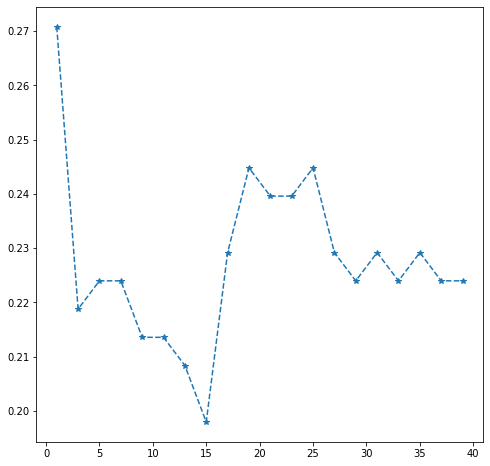

In [38]:
plt.figure(figsize=(8,8))
plt.plot(range(1,40,2),error,'--*')

In [39]:
df[df['error']==min(df['error'])]

,k,error
7,15,0.197917


### Fit the model

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
model=KNeighborsClassifier(n_neighbors=15,p=2,metric='euclidean')
model.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=15)

### Prediction

In [42]:
Y_pred=model.predict(X_test)
Y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### Accuracy Of the model

In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [44]:
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[117,  13],
       [ 25,  37]], dtype=int64)

In [46]:
ac=accuracy_score(Y_test,Y_pred)
ac

0.8020833333333334